In [1]:
!nvidia-smi

Fri Jun 14 09:08:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [15]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.3 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cyc

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="ZFgTfNcUwrEoE7v8neJ9")
project = rf.workspace("yolow-ewumd").project("vehicles-oy6ze")
version = project.version(1)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicles-1 in yolov8:: 100%|██████████| 1104/1104 [00:00<00:00, 5761.92it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=[720,480] plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 314MB/s]
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/vehicles-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=[720, 480], save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

In [13]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2880.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch2881.jpg
confusion_matrix.png				    R_curve.png       train_batch2882.jpg
events.out.tfevents.1718356479.4073bfc22da5.2440.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


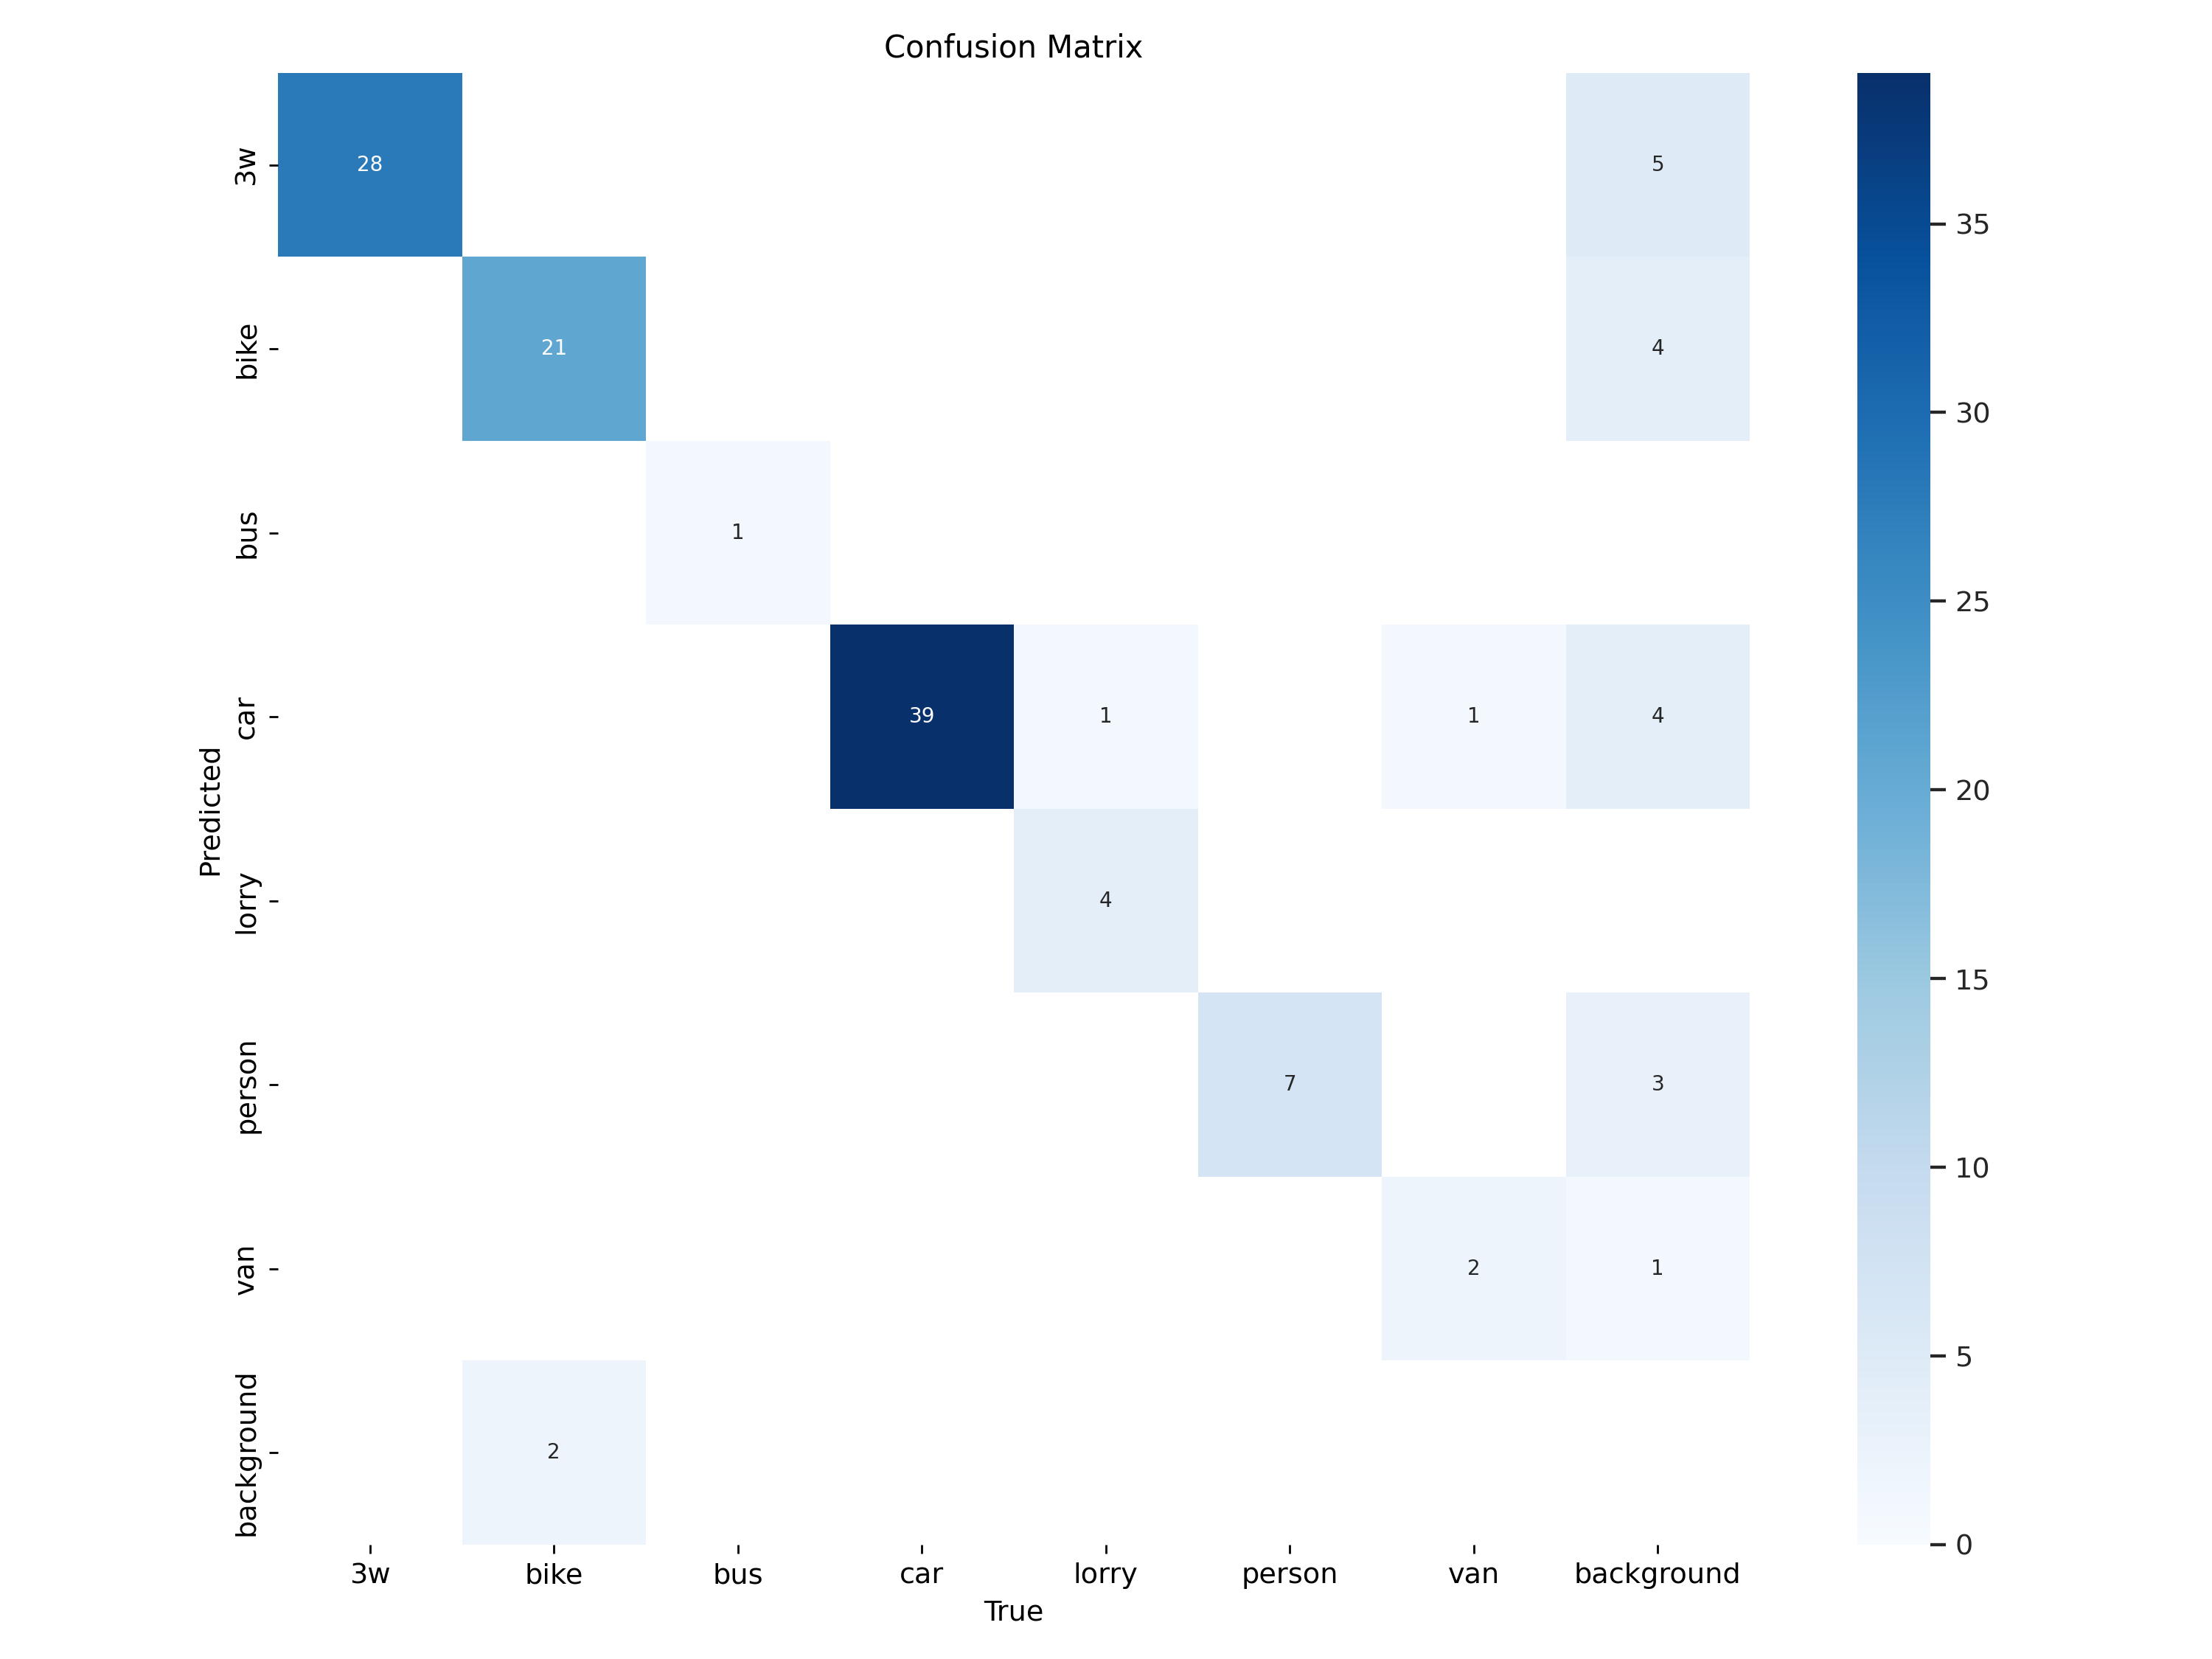

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


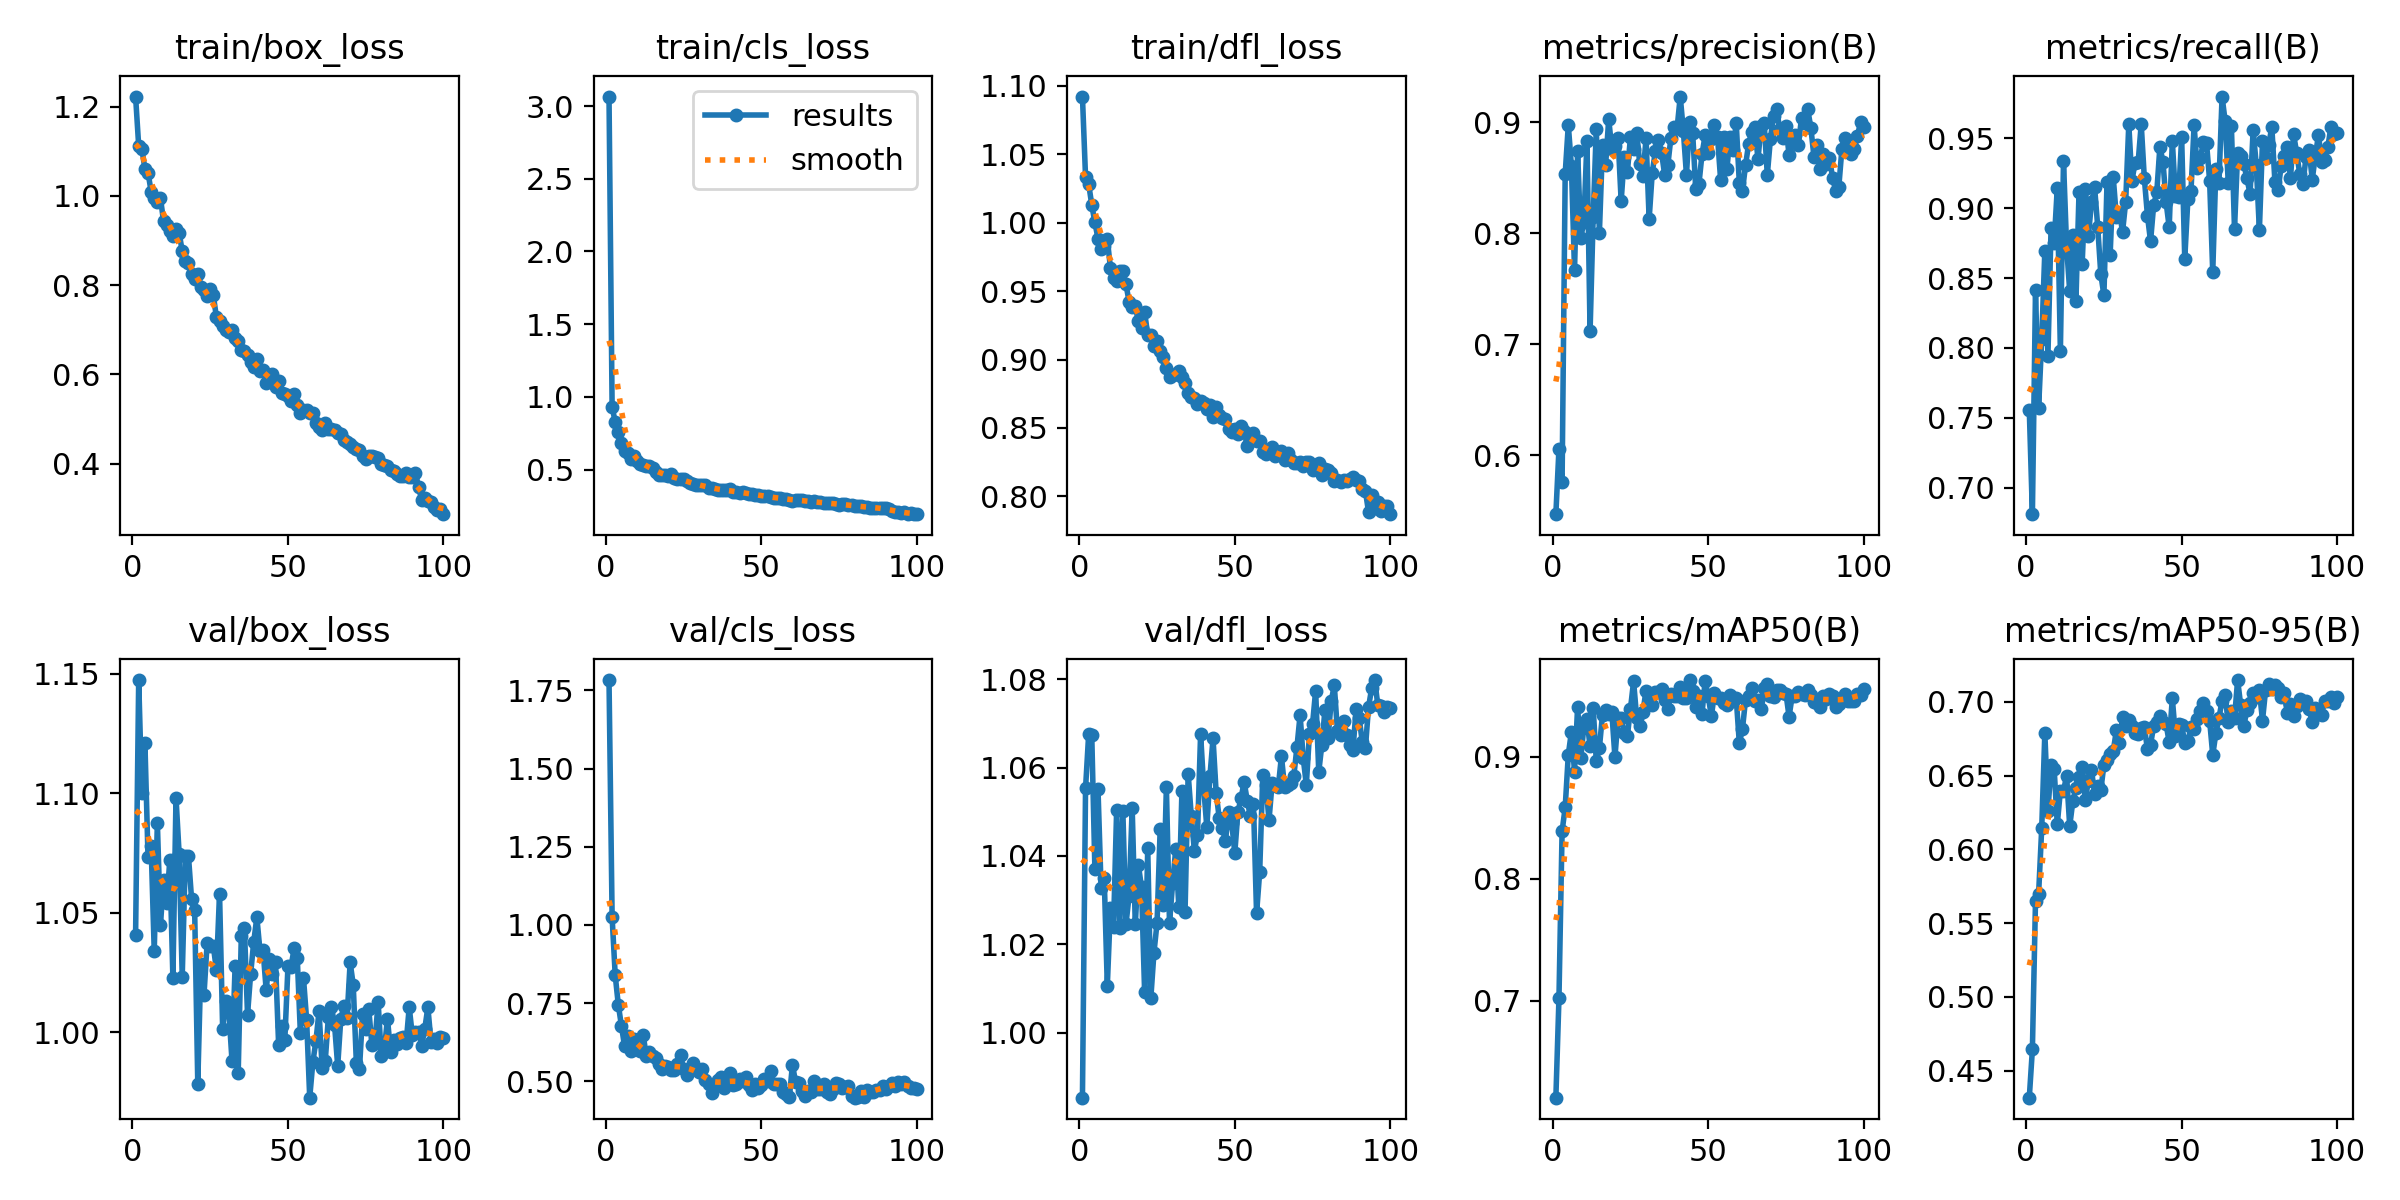

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


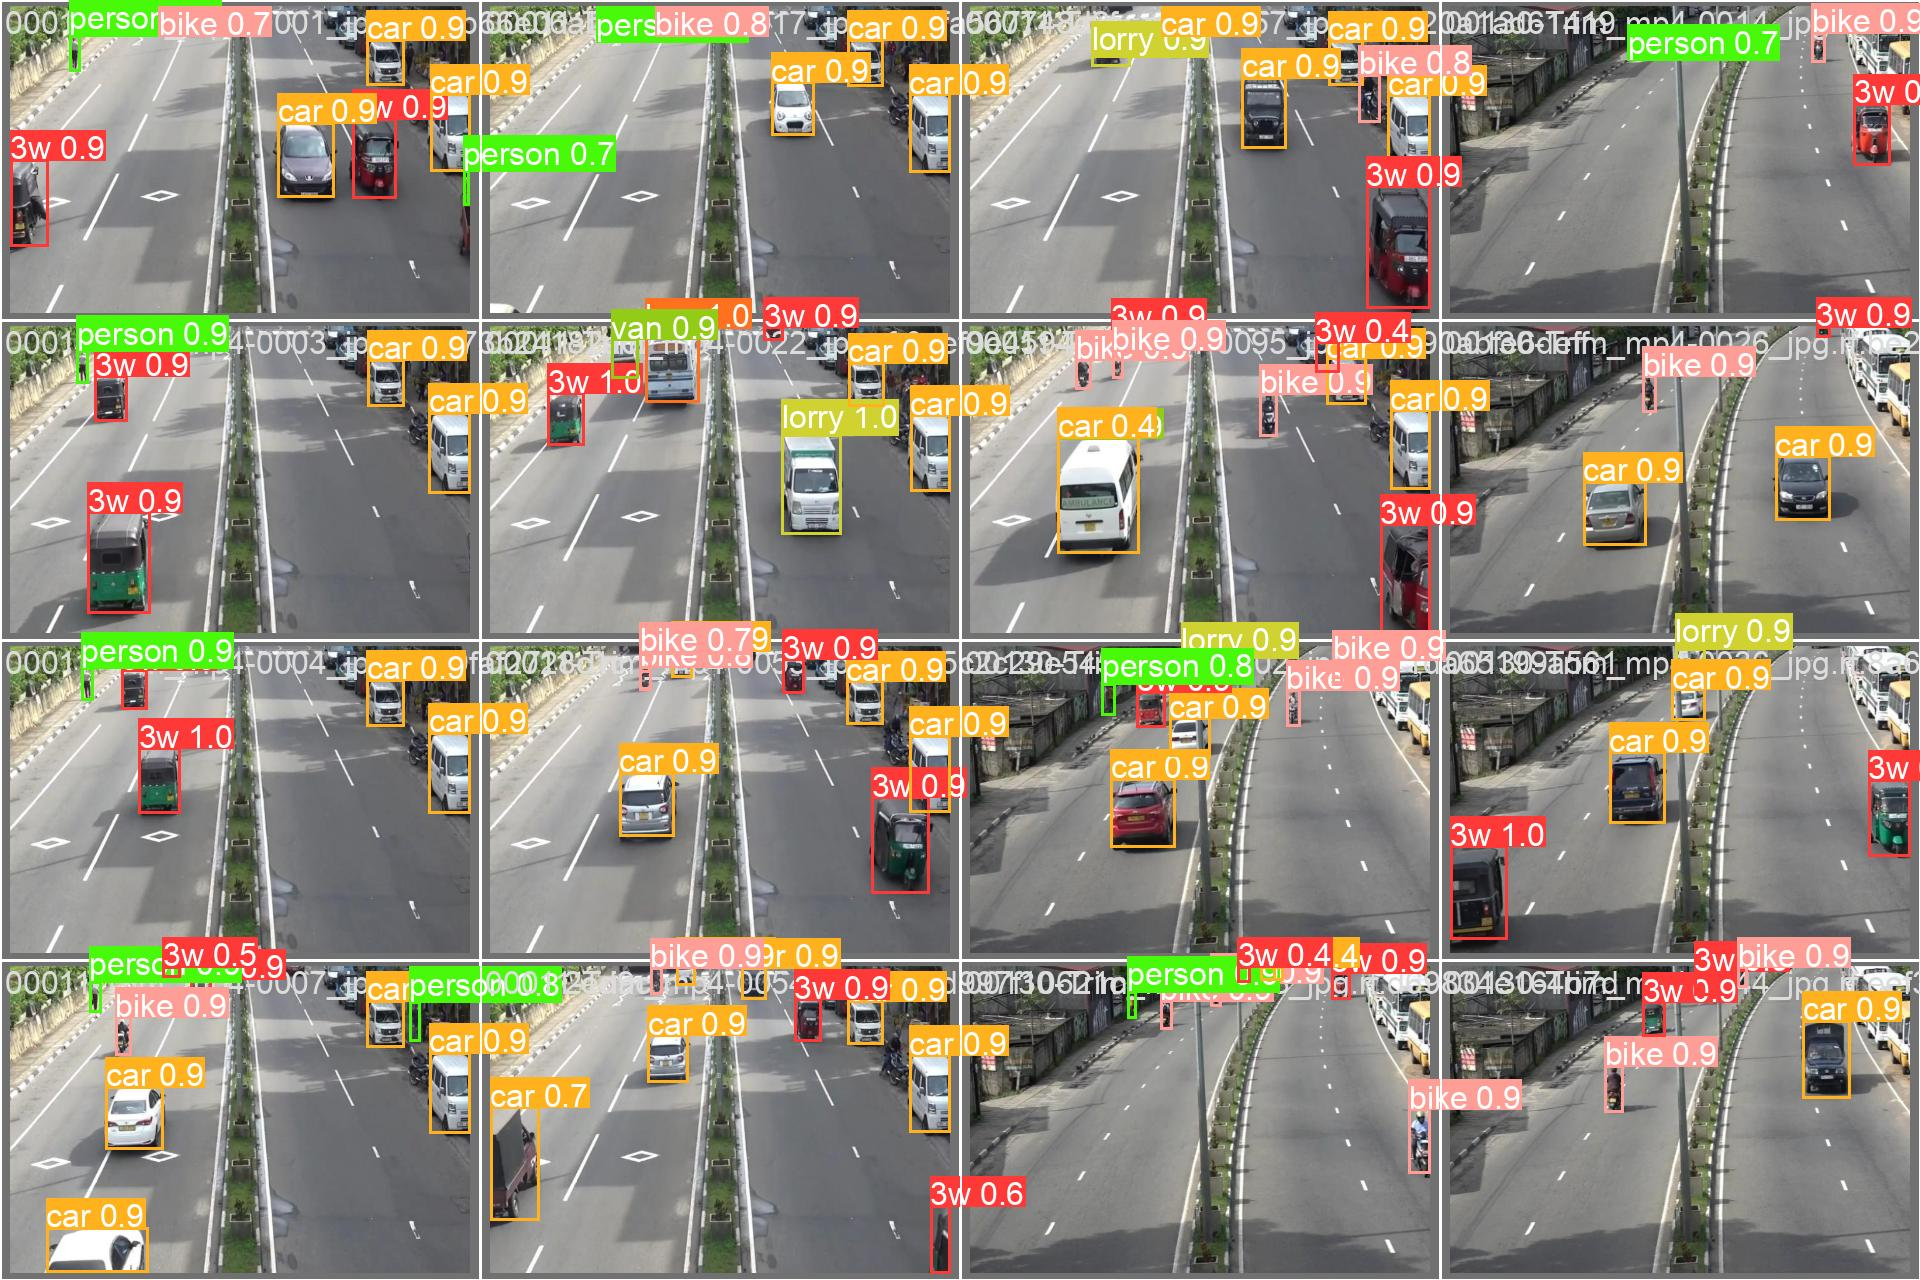

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/vehicles-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.47s/it]
                   all         21        106        0.9      0.939      0.956      0.716
                    3w         21         28       0.95      0.964      0.988      0.747
                  bike         21         23      0.891      0.913      0.956      0.638
                   bus         21          1      0.891          1      0.995      0.697
                   car         21         39      0.935          1      0.991      0.816
                 lorry         21          5          1      0.842      0.995       0.77
                person         21 

## Inference with Custom Model

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/21 /content/datasets/vehicles-1/test/images/00011-Trim_mp4-0018_jpg.rf.4b7560821192e08708bad9c0c7b49a53.jpg: 512x736 3 cars, 1 person, 1 van, 106.0ms
image 2/21 /content/datasets/vehicles-1/test/images/00011-Trim_mp4-0031_jpg.rf.de0c185f77d200cad7d78ab53ac267bf.jpg: 512x736 2 bikes, 4 cars, 15.3ms
image 3/21 /content/datasets/vehicles-1/test/images/00011-Trim_mp4-0035_jpg.rf.1536acac01c450bcecc72610d3acd3f5.jpg: 512x736 6 cars, 15.1ms
image 4/21 /content/datasets/vehicles-1/test/images/00011-Trim_mp4-0042_jpg.rf.c53db9be13de6efff4989dde2a808b4d.jpg: 512x736 1 3w, 1 bus, 4 cars, 15.2ms
image 5/21 /content/datasets/vehicles-1/test/images/00011-Trim_mp4-0050_jpg.rf.32e29f95027090d4da8846c74542fd45.jpg: 512x736 2 3ws, 5 bikes, 1 bus, 3 cars, 1 lorry, 15.2ms
image 6

**NOTE:** Let's take a look at few results.

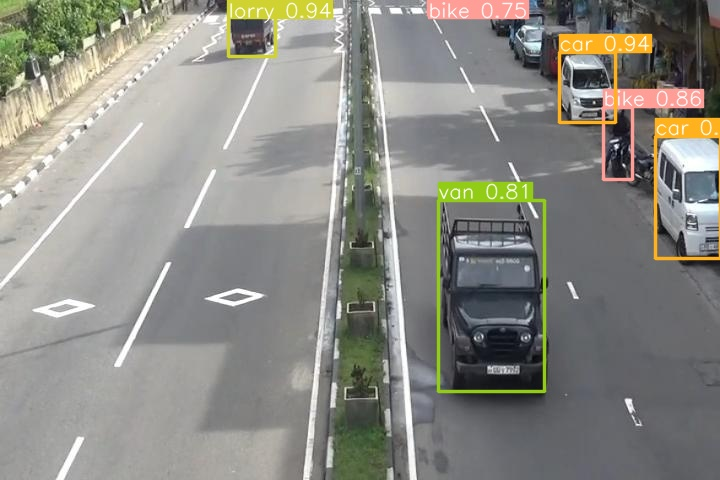

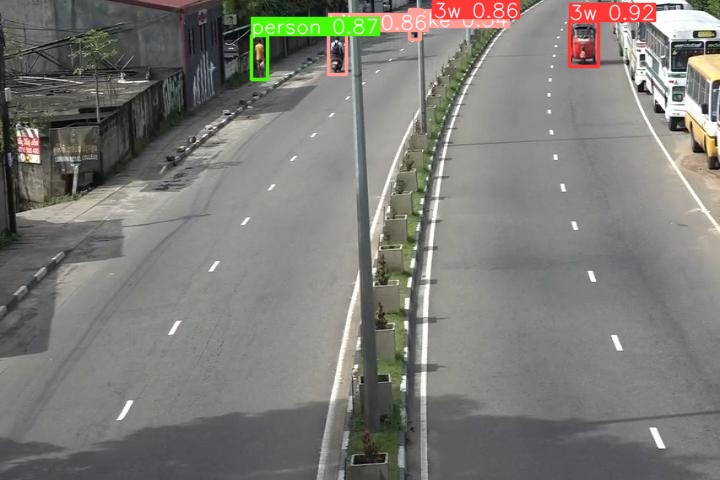

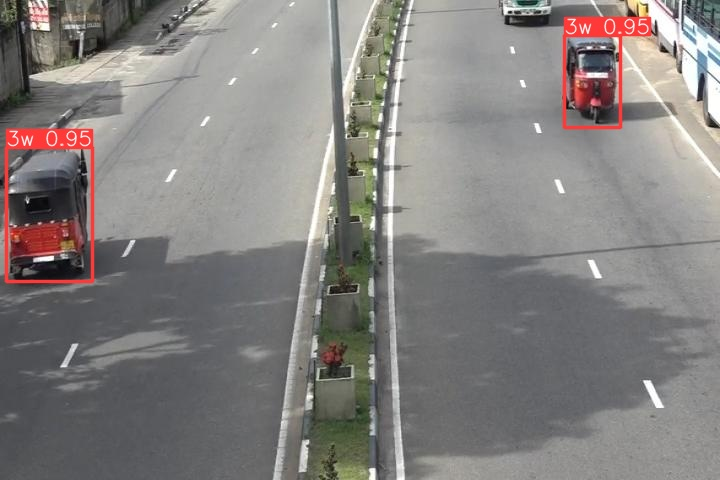

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [22]:
# Zip the folder
!zip -r runs.zip runs

# Download the zip file
from google.colab import files
files.download('runs.zip')


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/00011-Trim_mp4-0058_jpg.rf.32c990cdc70f4d66e01e4b80b45ac3cf.jpg (deflated 3%)
  adding: runs/detect/predict/00130-Trim_mp4-0009_jpg.rf.941d665fcd46cd6c79479c84009526fd.jpg (deflated 4%)
  adding: runs/detect/predict/00130-Trim_mp4-0120_jpg.rf.0189ba618ad94be5cb91c22367cfb54b.jpg (deflated 4%)
  adding: runs/detect/predict/00011-Trim_mp4-0072_jpg.rf.a6f207113bd14f98578e85df6335f23a.jpg (deflated 3%)
  adding: runs/detect/predict/00011-Trim_mp4-0018_jpg.rf.4b7560821192e08708bad9c0c7b49a53.jpg (deflated 4%)
  adding: runs/detect/predict/00011-Trim_mp4-0064_jpg.rf.ca4a157b3fb947af07f6ce3879e67c62.jpg (deflated 3%)
  adding: runs/detect/predict/00130-Trim_mp4-0121_jpg.rf.685ccea8d661951bf802befe0ed47df9.jpg (deflated 4%)
  adding: runs/detect/predict/00130-Trim_mp4-0104_jpg.rf.4b38e98a4bcf7611e1a2b912e1f00ba3.jpg (deflated 4%)
  adding: runs/detect/predict/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/sample.mp4' save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 102.0ms
video 1/1 (2/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.7ms
video 1/1 (3/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.6ms
video 1/1 (4/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.6ms
video 1/1 (5/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.7ms
video 1/1 (6/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detections), 10.6ms
video 1/1 (7/22579) /content/I used to be insecure and envy others Heres my advice.mp4: 384x640 (no detection